In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Admission_Predict.csv')


In [3]:
print(data.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [4]:
X = data.drop(['Chance of Admit ', 'Serial No.'], axis=1)
y = data['Chance of Admit ']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0046170033772850155
R-squared: 0.821208259148699


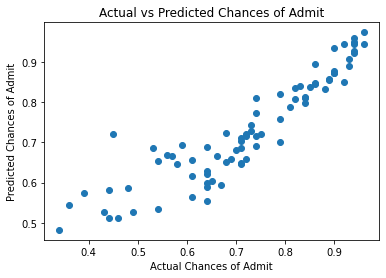

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Chances of Admit')
plt.ylabel('Predicted Chances of Admit')
plt.title('Actual vs Predicted Chances of Admit')
plt.show()

In [11]:
print("\nEnter details for admission prediction:")
gre_score = float(input("Enter GRE Score: "))
toefl_score = float(input("Enter TOEFL Score: "))
university_rating = float(input("Enter University Rating: "))
sop = float(input("Enter SOP score (out of 5): "))
lor = float(input("Enter LOR score (out of 5): "))
cgpa = float(input("Enter CGPA: "))
research = float(input("Enter Research Experience (1 for yes, 0 for no): "))


Enter details for admission prediction:
Enter GRE Score: 320
Enter TOEFL Score: 120
Enter University Rating: 5
Enter SOP score (out of 5): 4
Enter LOR score (out of 5): 5
Enter CGPA: 8
Enter Research Experience (1 for yes, 0 for no): 0


In [12]:
new_data = pd.DataFrame([[gre_score, toefl_score, university_rating, sop, lor, cgpa, research]],
                        columns=X.columns)
new_prediction = model.predict(new_data)

In [13]:
print(f"\nPredicted Chance of Admit: {new_prediction[0]}")



Predicted Chance of Admit: 0.7245325597083574


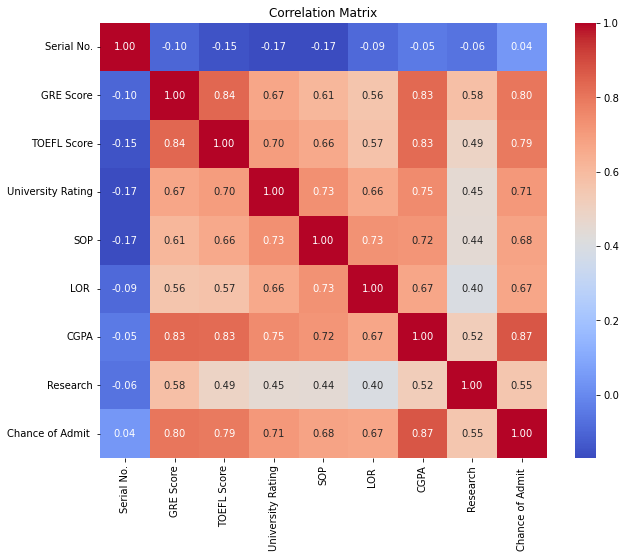

In [14]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



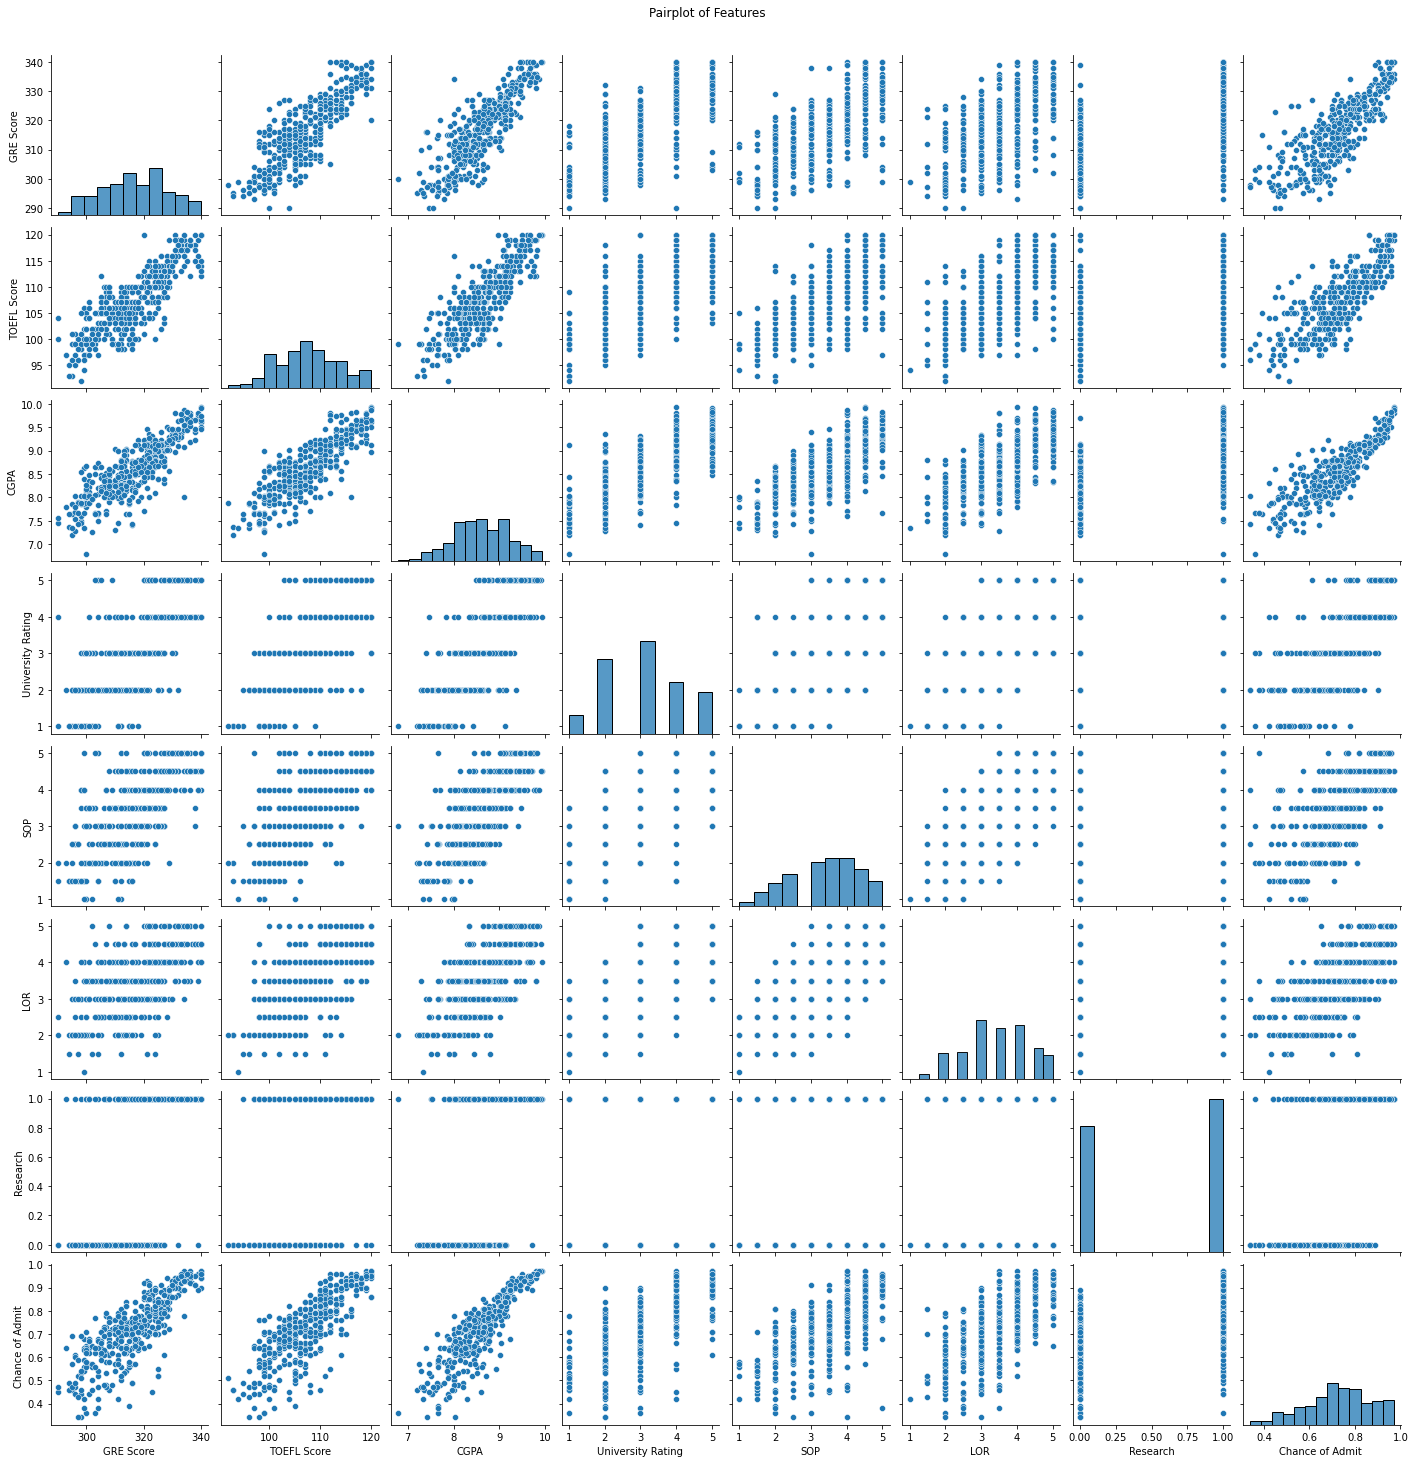

In [15]:
sns.pairplot(data, vars=['GRE Score', 'TOEFL Score', 'CGPA', 'University Rating', 'SOP', 'LOR ', 'Research', 'Chance of Admit '])
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [16]:
plt.figure(figsize=(15, 5))

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution of GRE Score')

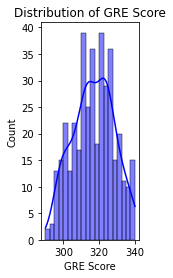

In [17]:
plt.subplot(1, 3, 1)
sns.histplot(data['GRE Score'], bins=20, kde=True, color='blue')
plt.title('Distribution of GRE Score')


Text(0.5, 1.0, 'Distribution of TOEFL Score')

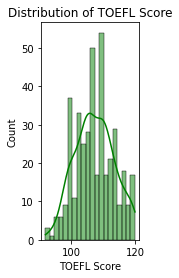

In [18]:
plt.subplot(1, 3, 2)
sns.histplot(data['TOEFL Score'], bins=20, kde=True, color='green')
plt.title('Distribution of TOEFL Score')

Text(0.5, 1.0, 'Distribution of CGPA')

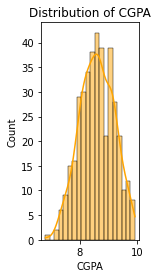

In [19]:
plt.subplot(1, 3, 3)
sns.histplot(data['CGPA'], bins=20, kde=True, color='orange')
plt.title('Distribution of CGPA')

In [20]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>